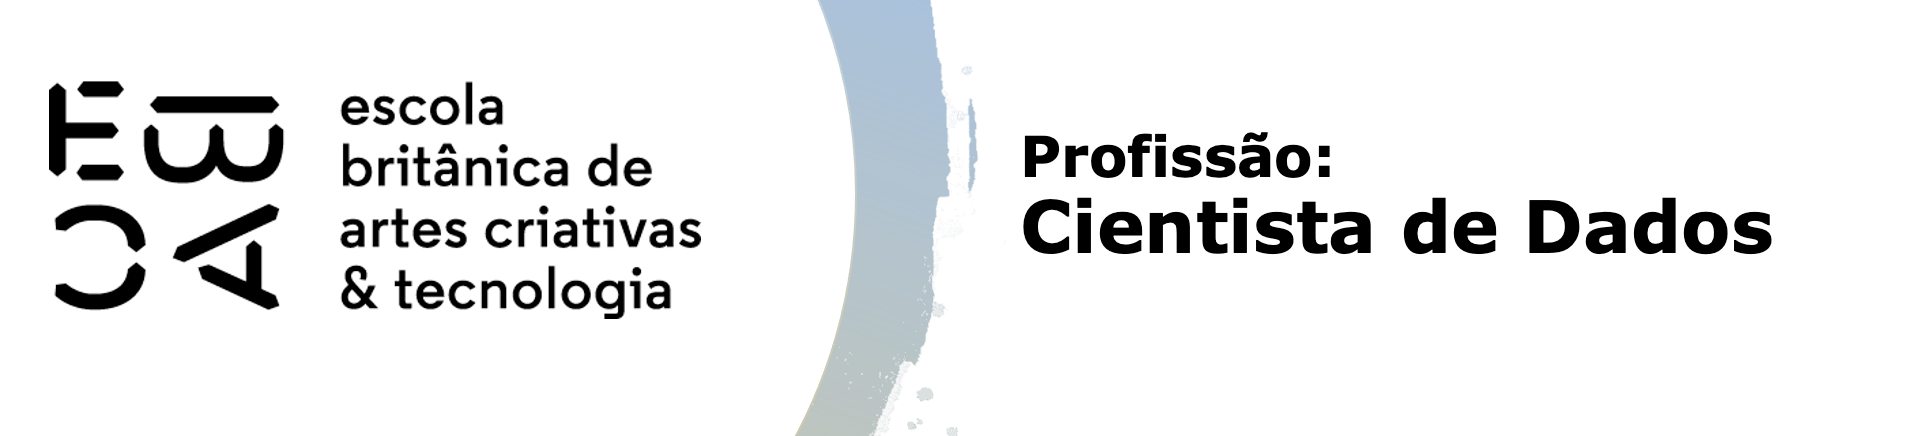



# Projeto de Parceria EBAC – Semantix 


## Previsão de Churn em Clientes de Telecomunicações

Neste projeto, vamos analisar dados de clientes de uma empresa de telecomunicações para entender quais fatores estão associados ao cancelamento de serviços (churn) e construir um modelo de Machine Learning capaz de prever quais clientes têm maior risco de cancelar.

O objetivo é mostrar, de forma prática, como a **análise de dados** e a **modelagem estatística** podem apoiar decisões de negócio, reduzindo a evasão de clientes e aumentando a receita da empresa.

---

### Objetivos do projeto

- Definir o problema de **churn em telecomunicações** e sua importância para o negócio.  
- Utilizar uma base de dados pública e não confidencial sobre clientes de telecom.  
- Realizar **análise exploratória de dados (EDA)** para encontrar padrões relevantes.  
- Construir e avaliar um **modelo de Machine Learning** para previsão de churn.  
- Apresentar **visualizações de dados** com os principais resultados e conclusões.

---

### Estrutura do notebook

1. Descrição do problema e dos dados  
2. Coleta e entendimento da base  
3. Limpeza e preparação dos dados  
4. Análise exploratória (EDA)  
5. Modelagem e avaliação  
6. Visualizações finais  
7. Conclusões


## 1. Descrição do problema e dos dados

Nesta seção, iremos:

- Reforçar o conceito de **churn** (evasão de clientes).  
- Apresentar a ideia da base de dados que será utilizada.  
- Preparar o terreno para a etapa de carregamento e inspeção inicial dos dados.

A base de dados utilizada é um conjunto público de clientes de uma empresa de telecomunicações, contendo informações sobre:

- características dos clientes,  
- serviços contratados (internet, telefone, TV etc.),  
- tempo de permanência,  
- valores cobrados,  
- e se o cliente **cancelou ou não** o serviço (`Churn`).


### 2. Coleta e entendimento dos dados

Nesta etapa, iremos:

- Importar as bibliotecas necessárias para manipulação e análise dos dados;
- Carregar a base de dados em um DataFrame;
- Verificar as primeiras linhas e informações gerais do dataset.

O objetivo aqui é ter uma visão inicial das variáveis disponíveis e entender a estrutura da base antes de realizar qualquer limpeza ou modelagem.


### 2.1 - Importar bibliotecas e carregar a base de dados

In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Modelagem (Machine Learning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)


### 2.2 Carregamento do dataset

Agora que já importamos as bibliotecas necessárias, vamos carregar a base de dados `telco_churn.csv` localizada na pasta `data/`.

Nesta etapa iremos:

- Ler o arquivo CSV com o pandas
- Visualizar as primeiras linhas da base
- Verificar as informações gerais do DataFrame

Isso nos dará uma visão inicial sobre as variáveis disponíveis e o formato do dataset.


In [6]:
# Carregar a base de dados
df = pd.read_csv("data/telco_churn.csv")

# Visualizar as primeiras linhas
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 3. Limpeza e preparação dos dados

Nesta etapa vamos:

- Converter a coluna `TotalCharges` para tipo numérico  
- Tratar valores ausentes após a conversão  

O objetivo é preparar o DataFrame para a análise exploratória e modelagem.


### 3.1 Converter TotalCharges para numérico

In [19]:
# Converter TotalCharges para float (coerce transforma erros em NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar valores nulos após conversão
df['TotalCharges'].isnull().sum()


11

### 3.2 Tratamento de valores ausentes

Após a conversão de `TotalCharges` para formato numérico, foram identificados 11 valores ausentes. Como o número é pequeno em relação ao total de registros (7043), vamos remover essas linhas para garantir a consistência do dataset.

### Remover valores nulos

In [22]:
# Remover linhas com valores nulos em TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Verificar novamente
df['TotalCharges'].isnull().sum()


0

### 4. Análise exploratória dos dados (EDA)

Nesta etapa iremos:

- Verificar a distribuição das variáveis
- Explorar relações entre `Churn` e outras variáveis
- Identificar padrões relevantes para a modelagem

O objetivo é obter insights iniciais sobre o comportamento dos clientes e os fatores relacionados ao cancelamento (`Churn`).

### 4.1 Distribuição da variável `Churn`

Vamos verificar a quantidade de clientes que cancelaram (`Yes`) e não cancelaram (`No`) o serviço.

In [29]:
df['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

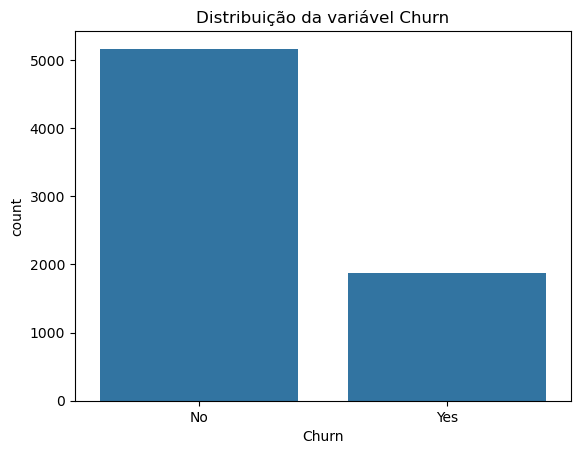

In [31]:
sns.countplot(x='Churn', data=df)
plt.title('Distribuição da variável Churn')
plt.show()


**Observação (4.1):**

- O dataset apresenta **5163 clientes que não cancelaram** e **1869 clientes que cancelaram** o serviço.
- Isso indica que a variável alvo `Churn` está **desbalanceada**, com mais casos de `No` do que `Yes`.
- Esse desbalanceamento deve ser considerado na etapa de modelagem, pois pode impactar as métricas de desempenho.


### 4.2 Relação entre Churn e tipo de contrato

Vamos analisar a taxa de churn para cada tipo de contrato (Month-to-month, One year e Two year).

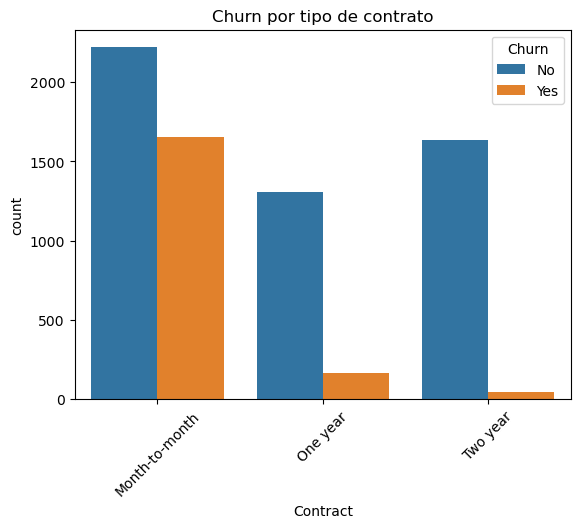

In [38]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn por tipo de contrato')
plt.xticks(rotation=45)
plt.show()


**Observação (4.2):**

- Clientes com **contratos mensais (Month-to-month)** apresentam **maior proporção** de cancelamento (`Yes`).
- Contratos de **1 ano (One year)** possuem churn intermediário.
- Contratos de **2 anos (Two year)** apresentam **menor taxa de churn**, sugerindo **maior fidelização** dos clientes com contratos de longo prazo.


### 4.3 Relação entre Churn e método de pagamento

Vamos verificar se existe relação entre o método de pagamento e o cancelamento do serviço.

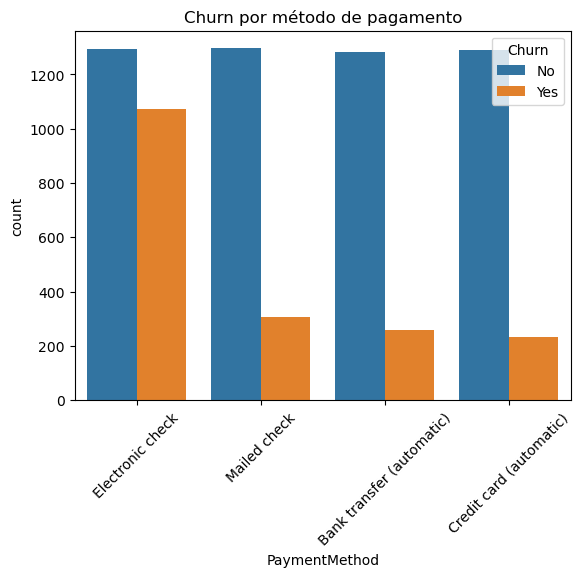

In [41]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn por método de pagamento')
plt.xticks(rotation=45)
plt.show()


**Observação (4.3):**

- O método de pagamento **Electronic check** apresenta maior proporção de clientes que cancelaram (`Yes`).
- Métodos automáticos como **Bank transfer** e **Credit card** possuem menor taxa de churn.


### 4.4 Relação entre Churn e tipo de serviço de internet (`InternetService`)

Vamos analisar o cancelamento (`Churn`) em relação ao tipo de serviço de internet contratado (DSL, Fiber optic e No internet service).

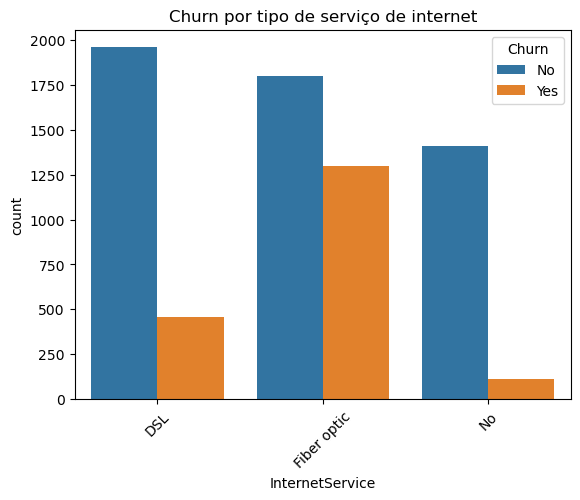

In [49]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn por tipo de serviço de internet')
plt.xticks(rotation=45)
plt.show()


**Observação (4.4):**

- Clientes com **internet via fibra óptica (Fiber optic)** apresentam a maior proporção de cancelamentos (`Yes`).
- Clientes com **DSL** possuem churn intermediário.
- Clientes sem serviço de internet (`No internet service`) apresentam **baixa taxa de churn**, indicando menor propensão ao cancelamento.


### 4.5 Relação entre Churn e valor mensal (`MonthlyCharges`)

Vamos analisar se existe relação entre o valor mensal cobrado e o cancelamento (`Churn`), verificando se clientes com mensalidades mais altas tendem a cancelar mais.

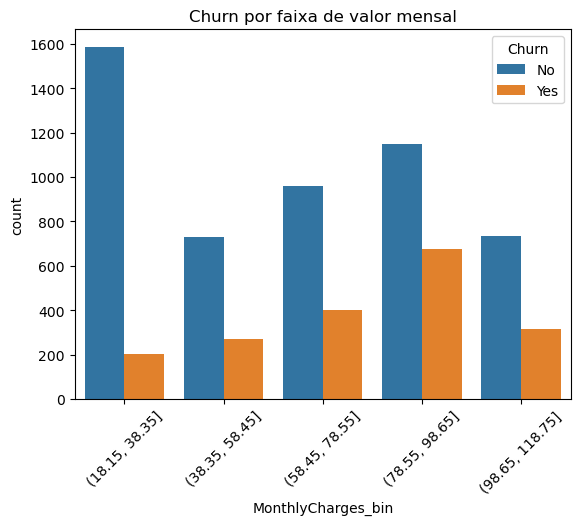

In [53]:
# Criar faixas (bins) para MonthlyCharges
df['MonthlyCharges_bin'] = pd.cut(df['MonthlyCharges'], bins=5)

sns.countplot(x='MonthlyCharges_bin', hue='Churn', data=df)
plt.title('Churn por faixa de valor mensal')
plt.xticks(rotation=45)
plt.show()


**Observação (4.5):**

- A faixa de mensalidades entre **aproximadamente R\$ 78,55 e R\$ 98,65** apresenta a maior proporção de cancelamentos (`Yes`).
- Clientes com **mensalidades mais baixas** tendem a apresentar menor churn.
- Esse padrão sugere que **valores mensais mais altos aumentam o risco de cancelamento**, indicando sensibilidade ao preço entre os clientes.


### 4.6 Relação entre Churn e tempo de permanência (`tenure`)

`tenure` representa o número de meses que o cliente permanece ativo na empresa. Vamos analisar se clientes mais novos (com pouco tempo de contrato) têm maior probabilidade de cancelar (`Churn`).

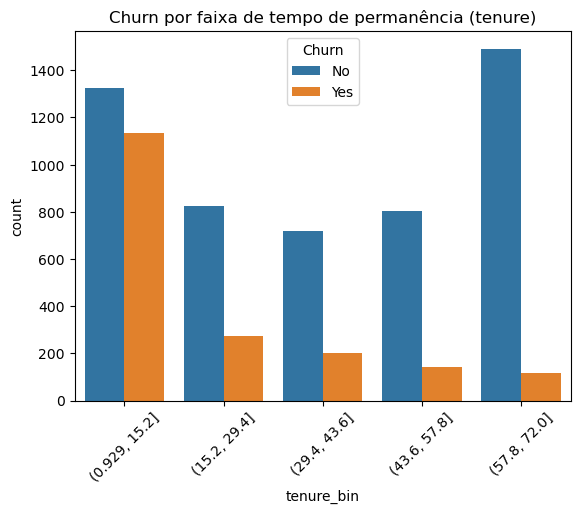

In [57]:
# Criar faixas (bins) para tenure
df['tenure_bin'] = pd.cut(df['tenure'], bins=5)

sns.countplot(x='tenure_bin', hue='Churn', data=df)
plt.title('Churn por faixa de tempo de permanência (tenure)')
plt.xticks(rotation=45)
plt.show()


**Observação (4.6):**

- A maior proporção de cancelamentos (`Yes`) ocorre na faixa de **tenure entre aproximadamente 0,9 e 15,2 meses**, indicando que clientes mais novos têm maior risco de churn.
- À medida que o tempo de permanência aumenta, a proporção de churn tende a diminuir.
- Esse comportamento sugere que **os primeiros meses são críticos para retenção**, e ações de fidelização nesse período podem reduzir significativamente o cancelamento.


### 5. Modelagem (Machine Learning)

Nesta etapa iremos:

- Preparar os dados para o modelo
- Separar features e variável alvo
- Transformar variáveis categóricas em numéricas
- Dividir em treino e teste
- Treinar um modelo simples e interpretável: Regressão Logística 

### 5.1 - Preparar os dados para o modelo

Nesta etapa vamos preparar o conjunto de dados para a modelagem e treinar um modelo de classificação para prever o cancelamento (`Churn`). 

Usaremos a **Regressão Logística**, que é um modelo amplamente utilizado em problemas de churn por ser simples, interpretável e eficiente.

### 5.2 - Separação entre variáveis independentes (X) e variável alvo (y)

In [81]:
# Variável alvo (y)
y = df['Churn']

# Features (X)
X = df.drop(['Churn', 'customerID'], axis=1)


### 5.3 Codificação de variáveis categóricas (One-Hot Encoding)

As variáveis categóricas serão convertidas em variáveis numéricas utilizando a técnica de one-hot encoding, necessária para a maioria dos algoritmos de machine learning.

In [85]:
# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# Verificar tamanho após conversão
X.shape


(7032, 38)

### 5.4 Divisão em conjuntos de treino e teste

Dividiremos os dados em 70% para treino e 30% para teste, garantindo validação adequada do modelo.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### 5.5 Treinamento do modelo de Regressão Logística

In [92]:
# Criar modelo
log_model = LogisticRegression(max_iter=1000)

# Treinar modelo
log_model.fit(X_train, y_train)


C:\anacondaa\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Confirmando que o objeto está instanciado e treinado.

In [94]:
log_model


LogisticRegression(max_iter=1000)

### 6. Avaliação do modelo

Nesta etapa vamos avaliar o desempenho da Regressão Logística utilizando métricas de classificação, incluindo matriz de confusão, acurácia, precisão, recall e F1-score.

### 6.1 - previsões

In [105]:
y_pred = log_model.predict(X_test)


### 6.2 - matriz de confusão e relatório

In [108]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1397  152]
 [ 276  285]]
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1549
         Yes       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



**Interpretação das métricas:**

- O modelo atingiu **80% de acurácia**, o que indica bom desempenho geral.
- Para a classe `No` (clientes que não cancelaram), o modelo apresentou **alto recall (0.90)** e **f1-score (0.87)**.
- Para a classe `Yes` (clientes que cancelaram), o recall foi de **0.51**, indicando que o modelo identificou corretamente cerca de metade dos clientes em risco de churn.
- Esse comportamento é esperado em datasets **desbalanceados**, onde há mais clientes que não cancelam do que clientes que cancelam.


### 6.3 - Curva ROC e AUC

A Curva ROC (Receiver Operating Characteristic) avalia o desempenho do modelo considerando diferentes limiares de decisão. O valor de AUC (Area Under the Curve) varia entre 0 e 1, onde valores mais altos indicam melhor capacidade de separação entre classes.

### Probabilidades + ROC

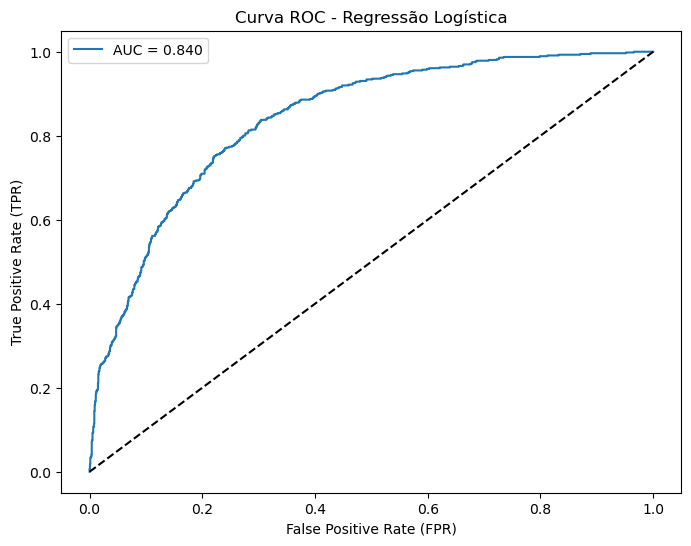

0.8400405528723611

In [119]:
# Probabilidades previstas para a classe positiva (Yes)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]

# Calcular pontos da curva ROC (definindo que a classe positiva é 'Yes')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='Yes')

# Calcular AUC
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend()
plt.show()

roc_auc


### Curva ROC e AUC — Interpretação

- O modelo atingiu **AUC = 0.84**, indicando boa capacidade de distinguir entre clientes que cancelaram (`Yes`) e clientes que permaneceram (`No`).
- Valores de **AUC acima de 0.75** são considerados bons em problemas de churn, o que confirma a qualidade do modelo de Regressão Logística.
- A curva ROC está claramente acima da linha diagonal, demonstrando que o modelo não está realizando previsões aleatórias e possui **bom poder discriminatório**.


### 7 - Conclusões e insights do projeto



Após a análise exploratória e a modelagem com Regressão Logística, foram obtidos os seguintes resultados e conclusões:

### 1. Perfil do churn
A proporção de clientes que cancelaram (`Yes`) foi de aproximadamente 27%, indicando que o problema de churn é relevante, embora exista uma maioria de clientes fiéis (`No`). Isso reforça a necessidade de ações específicas de retenção.

### 2. Principais variáveis relacionadas ao churn
Com base na análise exploratória, destacam-se fatores associados ao cancelamento:

- Contratos mensais (Month-to-month) apresentam maior taxa de churn.
- O método de pagamento "Electronic check" está fortemente associado ao churn.
- Clientes com internet via fibra óptica (Fiber optic) apresentam maior risco de cancelamento.
- Mensalidades elevadas, especialmente na faixa de R$ 78 a R$ 98, estão relacionadas a maior churn.
- Clientes recentes, com até 15 meses de permanência, apresentam alto risco de churn.

Esses fatores representam oportunidades para ações preventivas.

### 3. Qualidade do modelo preditivo
O modelo de Regressão Logística apresentou:

- Acurácia: 80%
- Recall para a classe churn (Yes): 0.51
- AUC: 0.84

Esses resultados indicam que o modelo possui bom poder de classificação e capacidade de identificar clientes em risco, mesmo com desbalanceamento no conjunto de dados.

### 4. Recomendações de negócio
Com base nas análises, sugerem-se as seguintes iniciativas:

- Incentivar a migração de contratos mensais para contratos anuais ou bienais.
- Oferecer benefícios ou descontos para clientes com mensalidades elevadas.
- Estimular métodos de pagamento automáticos (cartão ou débito em conta).
- Implementar ações de retenção precoce nos primeiros 12 a 15 meses de contrato.

### 5. Limitações e trabalhos futuros
- O modelo não tratou explicitamente o desbalanceamento da variável alvo.
- Modelos mais complexos, como Random Forest ou XGBoost, podem melhorar o recall da classe churn.
- Técnicas como SMOTE ou ajustes de class_weight podem ser exploradas para melhorar a detecção de clientes em risco.

**Conclusão geral:**  
A análise demonstrou que técnicas de ciência de dados e machine learning são eficazes na identificação de clientes com maior probabilidade de cancelamento, permitindo ações mais direcionadas para retenção e melhoria da experiência do cliente.
